In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

from PatchTST_supervised.utils.metrics import metric, MAE, MAPE

In [2]:
def data_inverse(label_c, original_dimension, original_position, scaler): #original dimensino(2D) without the label_c column
    temp_matrix = np.full(original_dimension, 0, np.float32)
    temp_matrix = np.insert(temp_matrix, original_position, label_c, axis=1)
    return scaler.inverse_transform(temp_matrix)[:, original_position]

In [3]:



scaler_path = r'scaler\sp500_index_pct_spec_s\sp500_index_pct_spec_s_7_1.pkl'

metrics_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\metrics.npy'

pred_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\pred.npy'

true_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\true.npy'




#load scaler
scaler = None

with open(scaler_path, 'rb') as f:
    scaler = pickle.load(f)


n_column = (scaler.n_features_in_) - 1


metrics = np.load(metrics_path, allow_pickle=True)
print(metrics)

pred_raw = np.load(pred_path)
pred_raw = pred_raw.reshape((pred_raw.shape[0]))
pred = data_inverse(pred_raw, (pred_raw.shape[0], n_column), n_column, scaler)
print(pred_raw[:10])
print(pred[:10])
print(pred.shape)
print(pred_raw.shape)

true_raw = np.load(true_path)
true_raw = true_raw.reshape((true_raw.shape[0]))
true = data_inverse(true_raw, (true_raw.shape[0], n_column), n_column, scaler=scaler)
print(true_raw[:10]) 
print(true[:10])
print(true.shape)
print(true_raw.shape)



[0.069867395 0.012187979 0.11039918 0.02542253 0.0023530985 0.15662134
 array([0.14661655], dtype=float32)]
[2.5416853 2.553901  2.514703  2.4974828 2.3173335 2.4064794 2.3256598
 2.2703469 2.366724  2.40463  ]
[2764.4746 2769.527  2753.3145 2746.1921 2671.6807 2708.5522 2675.1245
 2652.2466 2692.109  2707.787 ]
(544,)
(544,)
[2.549677  2.5209055 2.4841802 2.279664  2.3992696 2.2859256 2.2437603
 2.343806  2.4141867 2.483407 ]
[2767.78 2755.88 2740.69 2656.1  2705.57 2658.69 2641.25 2682.63 2711.74
 2740.37]
(544,)
(544,)


c:\Users\Vincent\.conda\envs\Pytorch_1_11\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
mae = MAE(pred, true)
mape = MAPE(pred, true)


In [5]:
print("MAE : {}".format(mae))
print("MAPE : %.10f"%(mape))

MAE : 28.89781951904297
MAPE : 0.0099373013


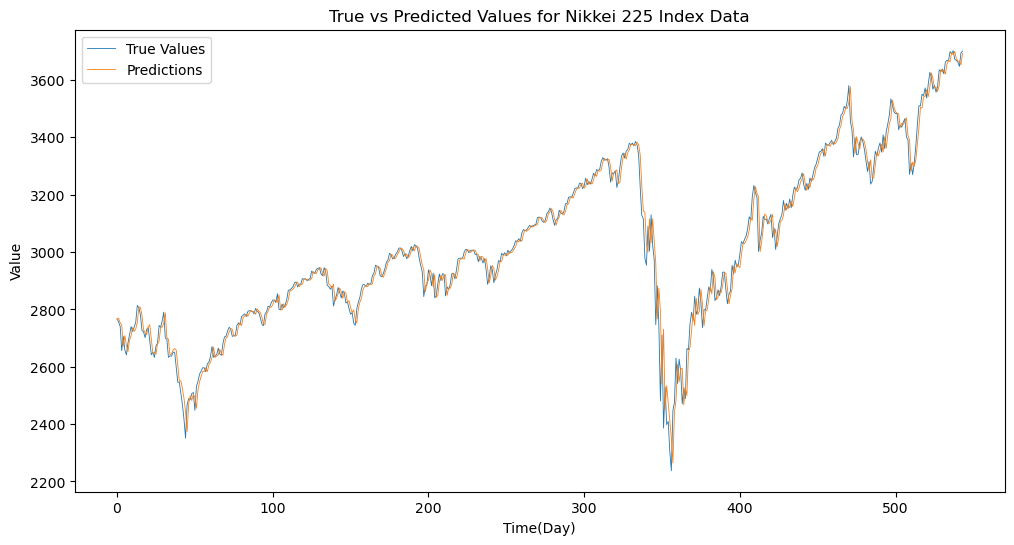

In [9]:
import matplotlib.pyplot as plt

time_axis = np.arange(len(pred))
plt.figure(figsize=(12, 6))

plt.plot(time_axis, true, label='True Values', linewidth=0.6)
plt.plot(time_axis, pred, label='Predictions', linewidth=0.6)

plt.xlabel('Time(Day)')
plt.ylabel('Value')
plt.title('True vs Predicted Values for Nikkei 225 Index Data')
plt.legend()

plt.show()

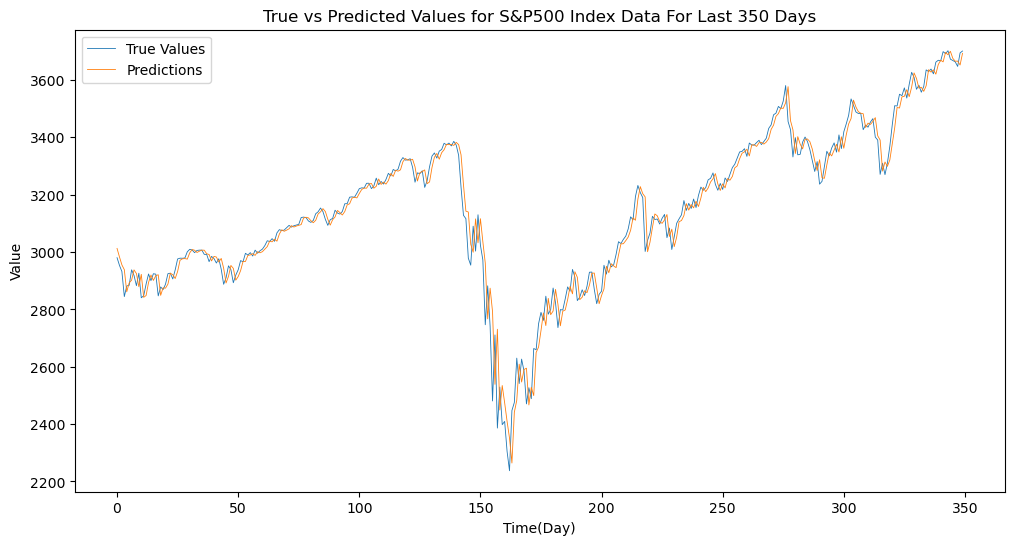

In [13]:
import matplotlib.pyplot as plt

last_value = 350


time_axis = np.arange(len(pred[-last_value:]))
plt.figure(figsize=(12, 6))

plt.plot(time_axis, true[-last_value:], label='True Values', linewidth=0.6)
plt.plot(time_axis, pred[-last_value:], label='Predictions', linewidth=0.6)

plt.xlabel('Time(Day)')
plt.ylabel('Value')
plt.title('True vs Predicted Values for S&P500 Index Data For Last {} Days'.format(last_value))
plt.legend()

plt.show()